# [E-02] Diabetes Data

## (1) 데이터 가져오기

### Import

In [1224]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #mse
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 데이터 load

In [1225]:
diabetes = load_diabetes() # 당뇨병 환자 데이터

### 데이터 확인

In [1226]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [1227]:
print(diabetes.data)
print(diabetes.target)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [1228]:
print(diabetes.feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

In [1229]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


## (2) 모델에 입력할 데이터 X 준비하기

In [1230]:
df_X = np.array(df_X)
type(df_X)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

In [1231]:
df_y = np.array(df_y)
type(df_y)

numpy.ndarray

In [1232]:
# df_y = df_y.reshape(-1, 1)

# colums = diabetes.feature_names
# colums.append('Target')

# data = np.concatenate([df_X, df_y], axis = 1)
# df_t = pd.DataFrame(data, columns = colums)
# print(df_t)

df_y = df_y.reshape(-1, 1) 처럼 reshape 해준 이유:  
  
ValueError: all the input arrays must have same number of dimensions  
but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)  
: concatenate 함수(ndarray의 결합)을 할 때 차원 배열의 개수가 달라 오류가 난것을 확인했으며  
차원배열의 개수를 맞추기 위해 reshape를 진행  
  

(차원배열의 개수의 문제가 아닌 컴퓨터프로그래밍은 공백이 아닌 정확한 차원수를 입력해줘야함)  
  
[사이킷런 (scikit-learn,sklearn, diabetes)](https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes)  
[[python] Numpy배열 ndarray를 결합시키는 방법](https://engineer-mole.tistory.com/234)

### 위 코드의 주석 이유

df_y를 reshape 를 다르게 진행하다보니 아래의 계산식들이 행렬 모양이 안맞아서 진행이 되질 않았으며  
dataFrame 에 대해서도 concatenate 로 묶어서 진행했으나 df_t는 전혀 사용하지 않고 있어  
전체 주석처리를 진행함 (concatenate를 위해 df_y를 reshape 했었으며 reshape 한 부분 때문에 계산식이 성립 안됨)  
  
[2022-11-09 , 22시 웅제퍼실님의 피드백 내용]

## (4) train 데이터와 test 데이터로 분리하기

In [1233]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 77)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


## (5) 모델 준비하기

In [1234]:
x = X_train
y = y_train
w = np.random.rand(10)
b = np.random.rand()

def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

10개의 class 값으로 Target의 예측값을 구해야하므로  
가중치인 w의 갯수는 10개가 필요하며 for 문을 통해  
각 class의 입력값 * class별 가중치(random) + 편향값(random)을 구하여  
전부 합산하여 Target에 대한 예측값을 구하는 모델

## (6) 손실함수 loss 정의하기

### 손실함수를 MSE 함수로 정의

In [1235]:
def mse(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [1236]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    l = mse(predictions, y)
    return l

## (7) 기울기를 구하는 gradient 함수 구현하기

In [1237]:
def gradient(x, w, b, y):
    n = len(w) # 가중치의 개수
    y_pred = model(x, w, b) # 예측값
    dw = 1/n * 2 * x.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

# gradient(X_train, w, b, y_train)
# print('dw : {0}'.format(dw))
# print('db : {0}'.format(db))

## (8) 하이퍼 파라미터인 학습률 설정하기

In [1238]:
learning_rate = 0.05
losses = [] # 손실함수 list로 기록

for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train) # train 데이터에 대한 기울기값 구하기
    # print(dw.shape)
    # print(w.shape)
    # w = w.reshape(1, -1)
    # test = learning_rate * dw
    # print(dw.shape)

    w -= learning_rate * dw # 학습률 * 기울기에 따른 가중치값
    b -= learning_rate * db # 학습률 * 기울기에 따른 편향값
    l = loss(X_train, w, b, y_train) # 손실된 값의 데이터
    losses.append(l)
    if i % 10 == 0: # i 값이 10이 될때마다 손실데이터 출력을 위한 if 문
        print('Iteration {0} : Loss {1:.4f}'.format(i, l))

Iteration 10 : Loss 7559.8191
Iteration 20 : Loss 4519.6825
Iteration 30 : Loss 3864.1581
Iteration 40 : Loss 3601.0362
Iteration 50 : Loss 3443.4719
Iteration 60 : Loss 3332.9547
Iteration 70 : Loss 3249.6177
Iteration 80 : Loss 3183.9406
Iteration 90 : Loss 3130.6277
Iteration 100 : Loss 3086.4870
Iteration 110 : Loss 3049.4601
Iteration 120 : Loss 3018.1313
Iteration 130 : Loss 2991.4696
Iteration 140 : Loss 2968.6881
Iteration 150 : Loss 2949.1645
Iteration 160 : Loss 2932.3946
Iteration 170 : Loss 2917.9628
Iteration 180 : Loss 2905.5229
Iteration 190 : Loss 2894.7838
Iteration 200 : Loss 2885.5003
Iteration 210 : Loss 2877.4644
Iteration 220 : Loss 2870.4992
Iteration 230 : Loss 2864.4545
Iteration 240 : Loss 2859.2019
Iteration 250 : Loss 2854.6319
Iteration 260 : Loss 2850.6506
Iteration 270 : Loss 2847.1777
Iteration 280 : Loss 2844.1444
Iteration 290 : Loss 2841.4916
Iteration 300 : Loss 2839.1683
Iteration 310 : Loss 2837.1310
Iteration 320 : Loss 2835.3419
Iteration 330 : L

### 시각화

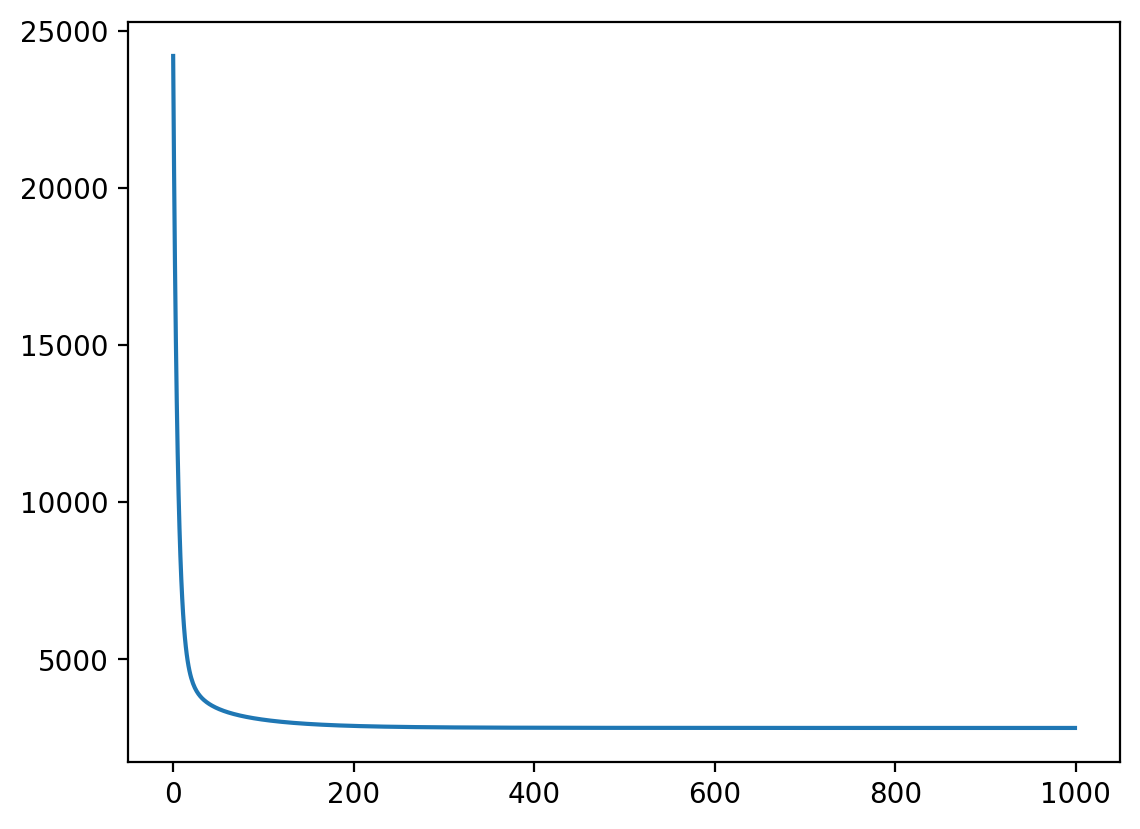

In [1239]:
plt.plot(losses)
plt.show()

## (10) test 데이터에 대한 성능 확인하기

In [1240]:
learning_rate_t = 0.05
losses_t = [] # 손실함수 list로 기록

for i in range(1, 1001):
    dw, db = gradient(X_test, w, b, y_test) # test 데이터에 대한 기울기값 구하기
    # print(dw.shape)
    # print(w.shape)
    # w = w.reshape(1, -1)
    # test = learning_rate * dw
    # print(dw.shape)

    w -= learning_rate * dw # 학습률 * 기울기에 따른 가중치값
    b -= learning_rate * db # 학습률 * 기울기에 따른 편향값
    l = loss(X_test, w, b, y_test) # 손실된 값의 데이터
    losses_t.append(l)
    if i % 10 == 0: # i 값이 10이 될때마다 손실데이터 출력을 위한 if 문
        print('Iteration {0} : Loss {1:.4f}'.format(i, l))

Iteration 10 : Loss 3135.5578
Iteration 20 : Loss 3115.4233
Iteration 30 : Loss 3100.1533
Iteration 40 : Loss 3086.8173
Iteration 50 : Loss 3074.8978
Iteration 60 : Loss 3064.1900
Iteration 70 : Loss 3054.5448
Iteration 80 : Loss 3045.8356
Iteration 90 : Loss 3037.9524
Iteration 100 : Loss 3030.7988
Iteration 110 : Loss 3024.2906
Iteration 120 : Loss 3018.3542
Iteration 130 : Loss 3012.9249
Iteration 140 : Loss 3007.9464
Iteration 150 : Loss 3003.3689
Iteration 160 : Loss 2999.1490
Iteration 170 : Loss 2995.2486
Iteration 180 : Loss 2991.6340
Iteration 190 : Loss 2988.2757
Iteration 200 : Loss 2985.1478
Iteration 210 : Loss 2982.2272
Iteration 220 : Loss 2979.4939
Iteration 230 : Loss 2976.9299
Iteration 240 : Loss 2974.5194
Iteration 250 : Loss 2972.2485
Iteration 260 : Loss 2970.1048
Iteration 270 : Loss 2968.0772
Iteration 280 : Loss 2966.1559
Iteration 290 : Loss 2964.3321
Iteration 300 : Loss 2962.5981
Iteration 310 : Loss 2960.9469
Iteration 320 : Loss 2959.3722
Iteration 330 : L

In [1241]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

2917.8068924600193

## (11) 정답 데이터와 예측한 데이터 시각화하기

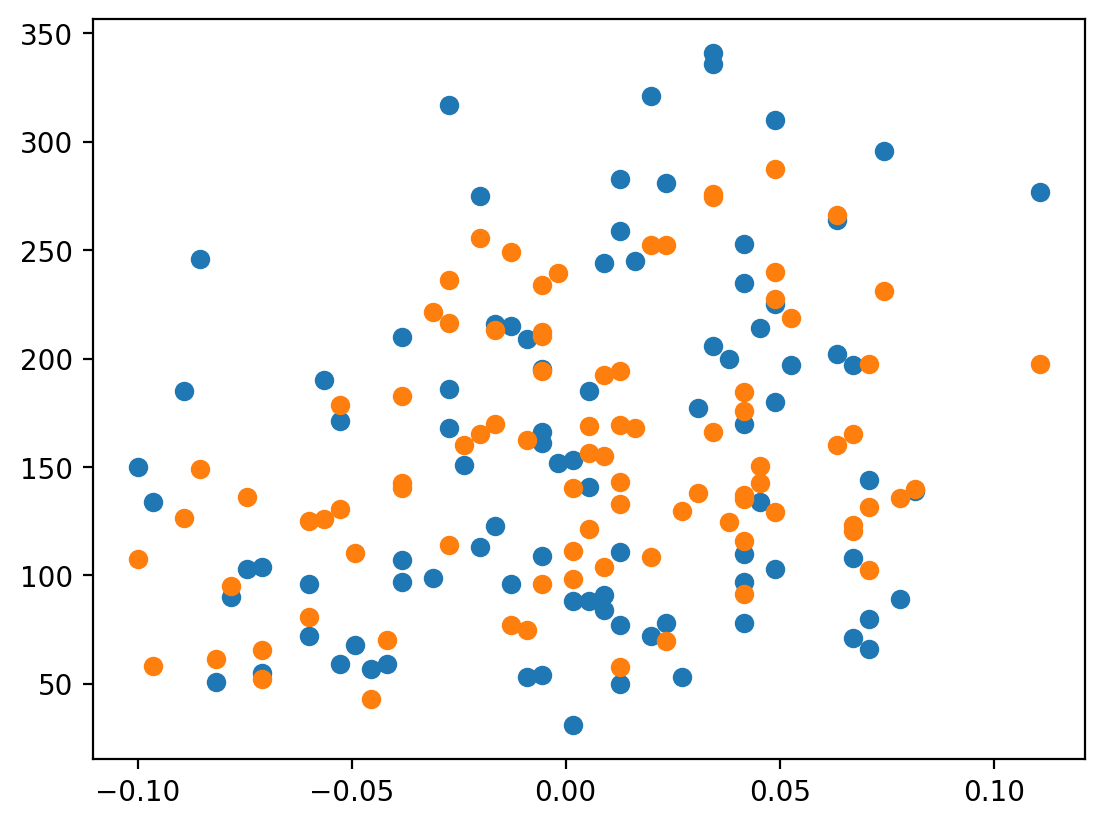

In [1242]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# [E-2] 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [1243]:
train_path = os.getenv('homepath') + '/Desktop/python/exploration_11_04/train.csv'
train = pd.read_csv(train_path)
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [1244]:
print(train.columns)
train.info()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [1245]:
train.shape

(10886, 12)

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [1246]:
train['datetime64'] = pd.to_datetime(train['datetime'], format = '%Y-%m-%d %H:%M:%S', errors = 'raise')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime64
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [1247]:
train['years'] = train['datetime64'].dt.year
train['month'] = train['datetime64'].dt.month
train['day'] = train['datetime64'].dt.day
train['hour'] = train['datetime64'].dt.hour
train['minute'] = train['datetime64'].dt.minute
train['second'] = train['datetime64'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  datetime64  10886 non-null  datetime64[ns]
 13  years       10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

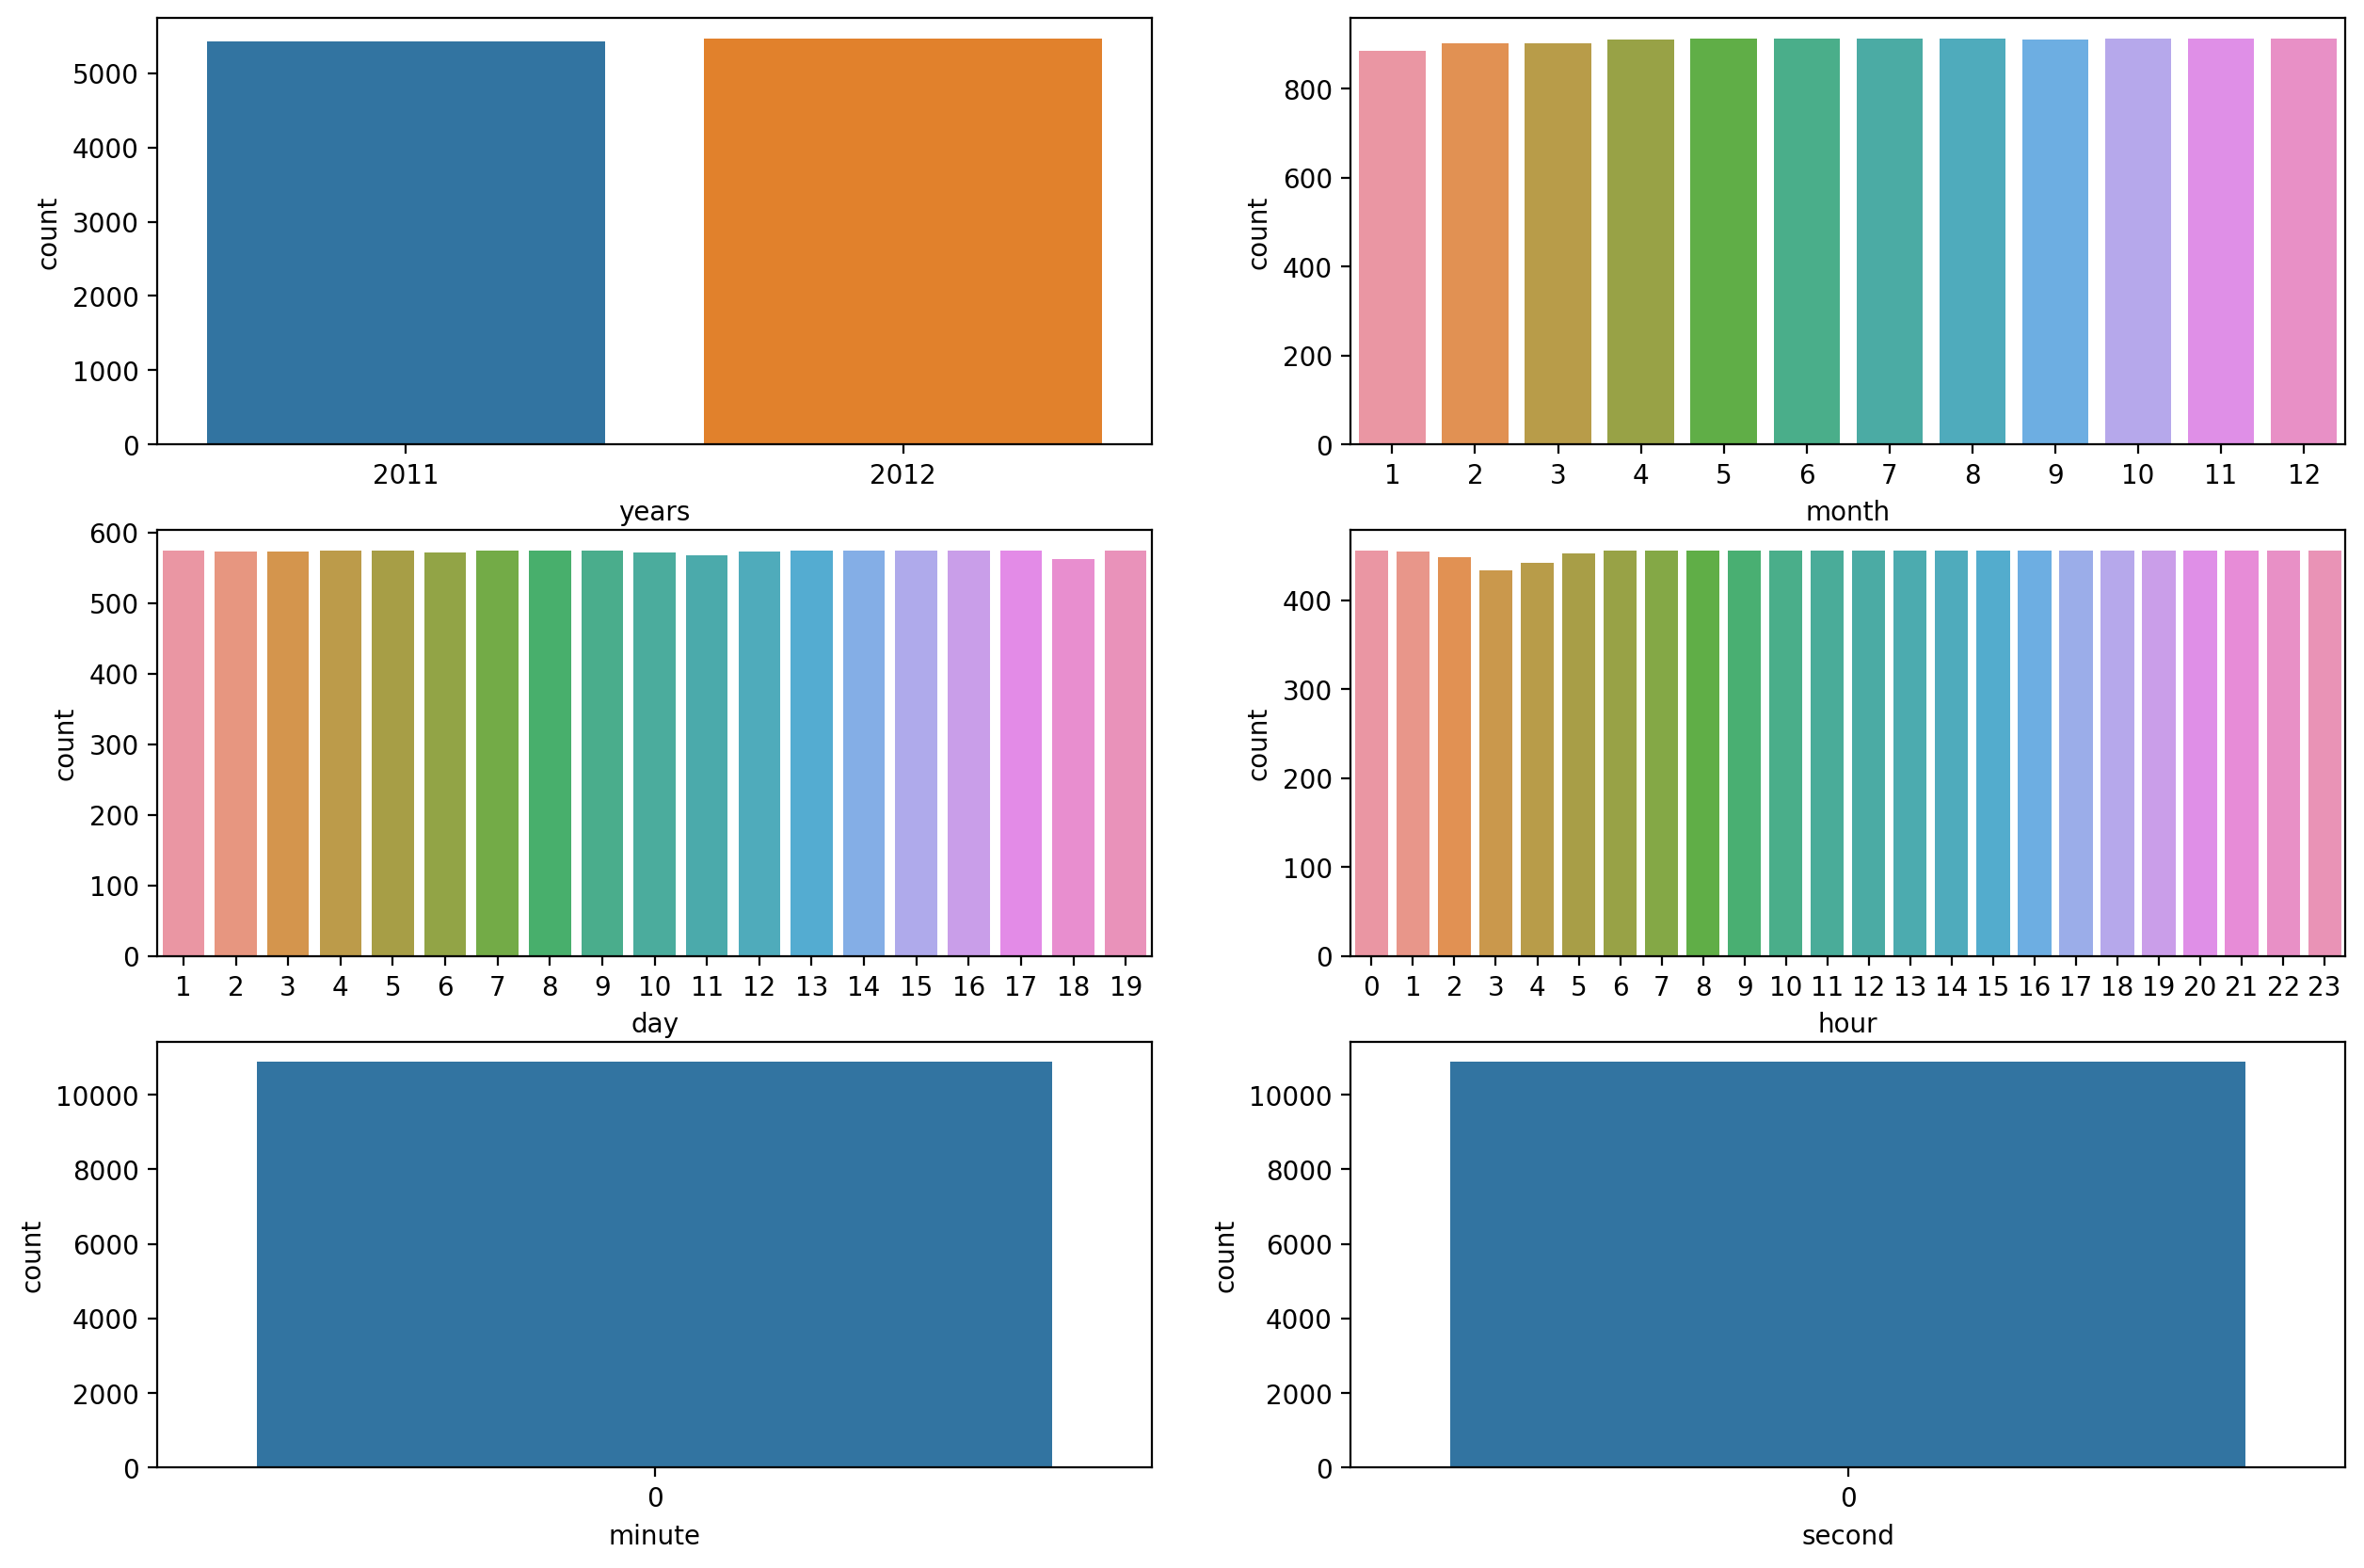

In [1248]:
# colums = ['years', 'month', 'day', 'hour', 'minute', 'second']  6개의 칼럼

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols =2)
figure.set_size_inches(15,10)

sns.countplot(x = 'years', data = train, ax = ax1)
sns.countplot(x = 'month', data = train, ax = ax2)
sns.countplot(x = 'day', data = train, ax = ax3)
sns.countplot(x = 'hour', data = train, ax = ax4)
sns.countplot(x = 'minute', data = train, ax = ax5)
sns.countplot(x = 'second', data = train, ax = ax6)

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [1249]:
train_o = train.copy()

y = train[['count']]
train = train.drop(['count', 'casual', 'registered', 'windspeed', 'datetime', 'datetime64'], axis = 1)
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'years', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

datetime 과 datetime64 를 drop 하는 이유  
: datetime 을 year, month, day, hour, minute, second 의 칼럼으로 나눴기 때문에  
 중복데이터 이므로 drop을 결정

In [1250]:
print(y.head())
print(train.head())

   count
0     16
1     40
2     32
3     13
4      1
   season  holiday  workingday  weather  temp   atemp  humidity  years  month  \
0       1        0           0        1  9.84  14.395        81   2011      1   
1       1        0           0        1  9.02  13.635        80   2011      1   
2       1        0           0        1  9.02  13.635        80   2011      1   
3       1        0           0        1  9.84  14.395        75   2011      1   
4       1        0           0        1  9.84  14.395        75   2011      1   

   day  hour  minute  second  
0    1     0       0       0  
1    1     1       0       0  
2    1     2       0       0  
3    1     3       0       0  
4    1     4       0       0  


### train/test 데이터 분리

In [1251]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 4444)

## (5) LinearRegression 모델 학습

### 모델 객체 생성

In [1252]:
linear_model = LinearRegression()

### 모델 학습

In [1253]:
linear_model.fit(X_train, y_train)

LinearRegression()

### 모델 예측 및 출력

In [1254]:
y_pred = linear_model.predict(X_test)
print(y_pred)

[[164.9072468 ]
 [289.13587496]
 [154.26788833]
 ...
 [200.75665724]
 [ 92.05611436]
 [ 59.78518685]]


#### y_pred 값과 target 간의 손실함수 값 계산(mse값과 rmse값)

In [1255]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

rmse = mse ** 0.5
print(rmse)

19364.086984348593
139.15490283977994


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

#### x = temp 값의 시각화

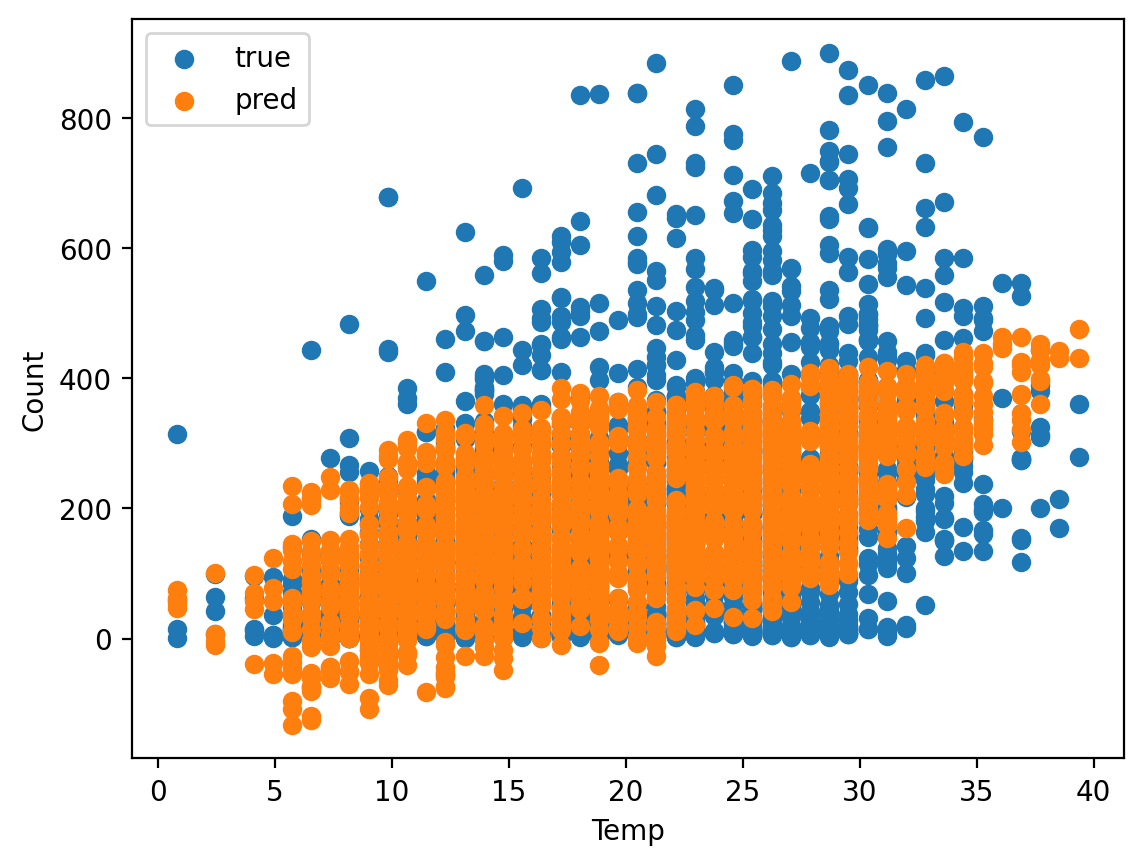

In [1256]:
x = X_test[['temp']]

plt.scatter(x, y_test, label = 'true')
plt.scatter(x, y_pred, label = 'pred')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.show()

#### x = humidity 값의 시각화

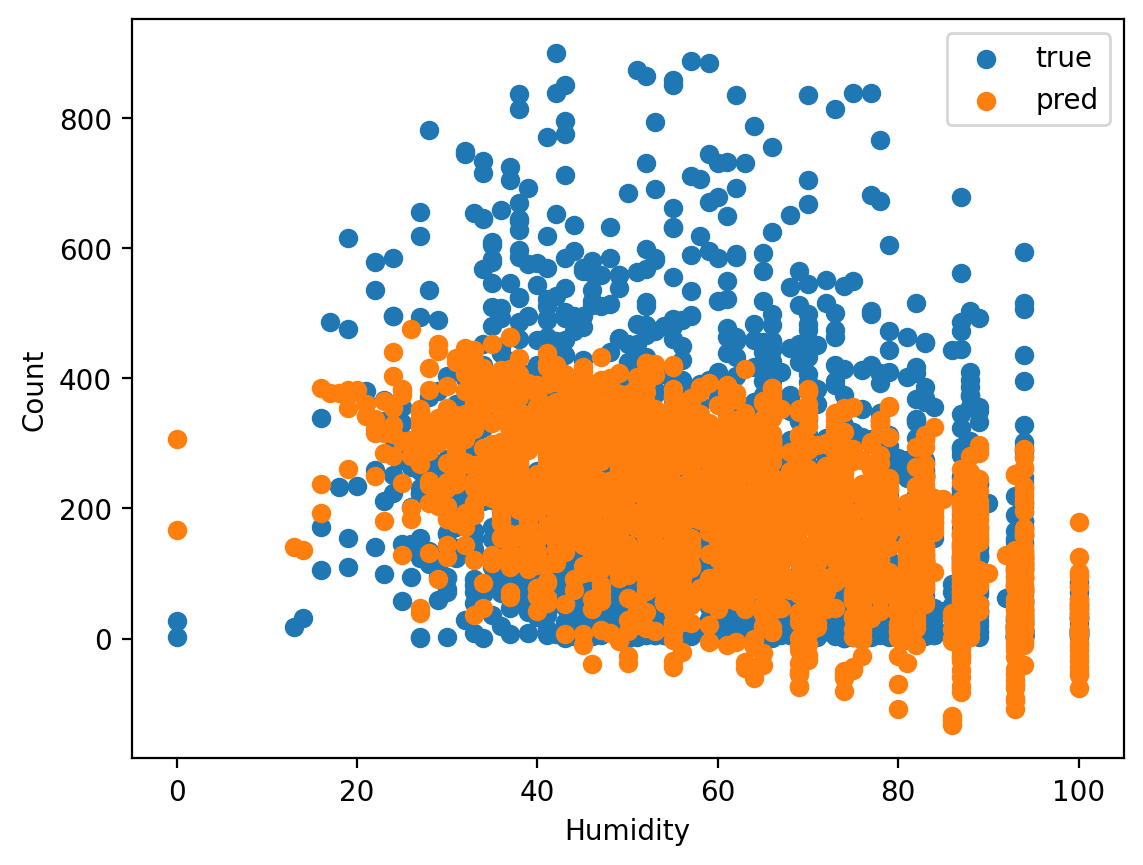

In [1257]:
x = X_test[['humidity']]

plt.scatter(x, y_test, label = 'true')
plt.scatter(x, y_pred, label = 'pred')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()

## 참고문헌 Reference  

[사이킷런 (scikit-learn,sklearn, diabetes)](https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes)  
[[python] Numpy배열 ndarray를 결합시키는 방법](https://engineer-mole.tistory.com/234)  
[4.2 선형회귀분석의 기초](https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html)  
Aiffel Exploration_2번 LMS 노드  
  

pandas datetime extract year month day 키워드로 검색해 보기:  
[Pandas Datetime to Date 부분(월, 연도 등)](https://datagy.io/pandas-extract-date-from-datetime/)  
  
[[시간 데이터 다루기] to_datetime활용하기](https://sarah0518.tistory.com/61)  
[Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)  
[4. 필요한 열(column) 추출하기](https://zephyrus1111.tistory.com/43)  
[Pandas - DataFrame에서 열 삭제 및 추가](https://blog.naver.com/rising_n_falling/221631637822)  
[Matplotlib Tutorial - 파이썬으로 데이터 시각화하기](https://wikidocs.net/book/5011)

Aiffel Fundamentals_14번 LMS 노드  


## 회고

프로젝트를 진행하면서 노드에 적힌 내용이 아닌 개인적으로 구글링하여 찾아보고  
변경하며 진행해보고 싶었었던 프로젝트였으나 실력부족과 시간적 여유가 부족해  
결국엔 Exploration2 의 노드 내용으로 대부분 진행하여 완성시킨 프로젝트입니다.  
  
1. 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  
평상시에 알고 있었던 데이터분석의 내용은 데이터를 데이터프레임으로 만들고  
데이터프레임 내에서 필요한 데이터를 추출 및 추가 진행하면서 데이터 전처리를 한다고만 알고 있었는데  
해당 데이터에서는 pd.dataFrame 으로 따로 묶지 않고 데이터 자체로만 사용하는 데이터였으며  
기존 알고 있었던 내용인 pd.dataFrame 으로 묶었을 때 여러가지 Error를 보게 해줬던 데이터였습니다.  
Error를 발견했었던 곳중에 가장 공부가 잘되었다고 생각들었던 Error는  
MSE값을 구하는 함수와 Gradient 함수, Learning_rate 값을 이용한 손실함수 수치 확인에서  
행열의 모양에 대한 Error 였으며 해당 Error가 어떤 문제로 발생했고 어떠한 방식으로 풀게 되었는지  
조웅제 퍼실님의 피드백 도움으로 알 수 있었던 노드였습니다.  
*: dataFrame 으로 묶기 위해 진행했었던 reshape가 문제였음을 확인하고 수정 후 진행  
  

2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  
두번째 프로젝트를 진행하며 느꼈었던 가장 중요한 내용, 시간분배의 필요성에 대해서  
가장 뼈저리게 느끼게 해준 노드였습니다.  
이미 1번 내용을 진행하며 Error 를 확인 및 구글링 및 피드백을 거치며 여러가지를 시도해볼 동안  
2번 내용에 대해선 전혀 진행을 하지 못하고 있었으며  
시간분배를 잘못하여 짧게 진행하게 되어 노드의 내용을 위주로 진행했던 데이터입니다.  
사실상 1번 노드의 내용처럼 여러가지의 시각화를 진행하려 시도해봤었으나 원하는 결과는 나오지 않았고  
시간이 부족하여 급하게 끝냈던점은 많이 아쉬웠지만 시간분배의 중요성을 깨닫게 해줬던 데이터라  
이점에 대해서도 많이 느끼고 배우게 해줬던 데이터이며...  
데이터에 대한 내용보다는 시간적인 내용을 주로 쓰게되는 지금도 아쉬움이 많이 남는 데이터입니다.